# A Preview of Plot Manager

**Plot Manager** provides a unified interface for making plots.

The object oriented interface provided by `matplotlib` is used behind the scenes, so nearly all the customizability provided by `matplotlib` is available if needed.

The philosophy is to create a **Plot Manager** object to handle all your plots. The following are some advantages of letting **Plot Manager** do the plotting for you.
- Make different *types* of plots, be it a line plot or histogram, with the same syntax.
- Pass arguments to the whatever type of plot you are making as regular arguments to **Plot Manager** methods.
- Add whatever data you want, plot only what you want to see. Easily overlay multiple plots on the same figure.

We will show small snippets of functionalities offered by **Plot Manager**.

# Quick plotting using Plot Manager

Instead of going through all the features of **Plot Manager**, let us consider a toy problem and plots things along the way.

## Simple Harmonic Motion

Suppose that you want to study simple harmonic motion. For simplicity, let us use the *sine* function to visualize the oscillations.

In [8]:
import numpy as np

import project_root # adds the root directory of the project to Python Path
from src.utilities.draw_plots import Plot_Manager

# time
t = np.linspace(0, 10, 1000)

# wave 1: a sine wave
w1 = np.sin(t)

# let's plot this: create a Plot Manager object and add this data to it
plot_manager = Plot_Manager()
# we not only add data, but specify labels for the axis,
# and for the data itself, which will be used in legends later
plot_manager.add_data(key = 'sine', xdata = t, ydata = w1, label = r'$w_1(t) = \sin(t)$')

Observe that we specified a **key**. This is a unique identifier for the data, which can be used to refer to this data later.\
If no key is specified, a unique number is internally assigned by Plot Manager.

Also observe that we specified the options needed for plotting while adding the data.

Since we have added some data, let's go ahead and plot it.

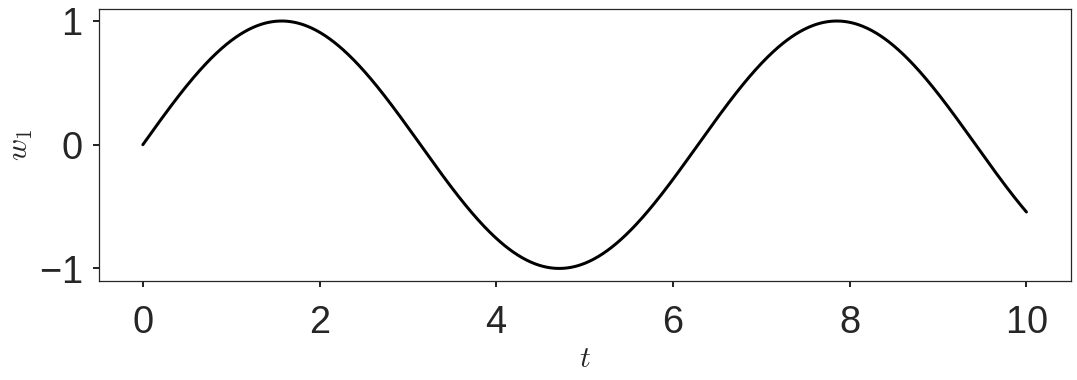

In [9]:
plot_manager.draw_plots(xlabel = r'$t$', ylabel = r'$w_1$', show_fig = False)

We could have specified `xlabel`, `ylabel` and `show_fig` to `add_data` as well.\
In general, arguments can either be passed to `add_data` or `draw_plots`.\
Arguments passed to `add_data` are saved for that particular data, while the arguments passed to `draw_plots` are used for plotting and then discarded.

What about the mysterious option `show_fig = False`? Of course we want to show the figure!\
`show_fig = False` simply suppresses `fig.show()`, which is required for GUI (an interactive backend) but not for Jupyter notebooks.\
In fact, Jupyter notebook will throw a warning if you call `fig.show()`.

### Experimental data

Now, suppose someone collected a bunch of data points by measuring a spring-mass system and handed the data over to you.\
You decide to plot the experimental data on top of your theoretical sine wave to get a visual cue of what's going on in the experiment.\
How do you go about this? Well, just add that data to the Plot Manager you already created and plot it.

In [10]:
# experimental data
t_exp  = np.linspace(0, 10, 50)   # time steps used in the experiments
w1_exp = np.sin(t_exp) + 0.1 * np.random.randn(t_exp.size) # there's always some noise in the experiments!

# add the experimental data and plot it
plot_manager.add_data(plot_type = 'discrete', key = 'exp', xdata = t_exp, ydata = w1_exp,\
                      label = r'$w_1(t) = \sin(t)$')

Observe that we have now specified a `plot_type`: we want the data points to be discrete points on the plot, without any line connecting the points.
> The effect generated by `plot_type = 'discrete'` can be achieved through a usual line plot by adding markers and disabling *linestyle*.\
But discrete data points are so commonly encountered that we have a shortcut for it.\
You also have the option of choosing a marker style of your liking.\
Note that the default plot type is *lineplot*, which is used if nothing is specified, as in the case of plotting the sine wave.

Okay, let's plot the data.

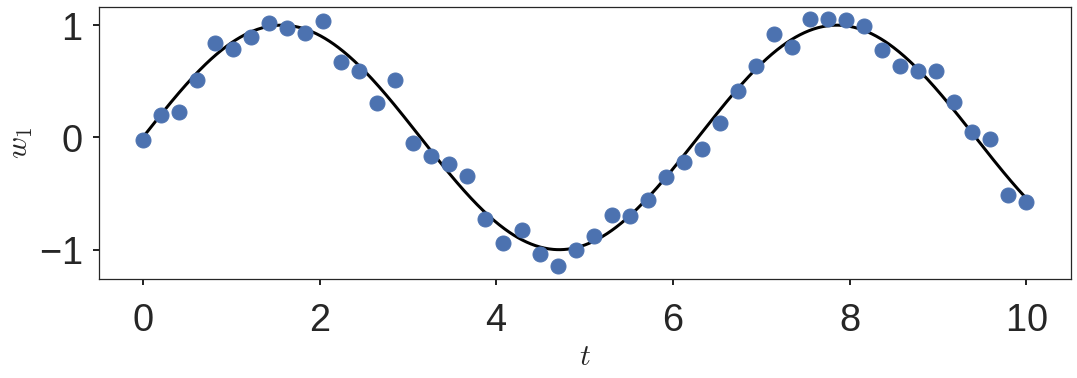

In [11]:
plot_manager.draw_plots(xlabel = r'$t$', ylabel = r'$w_1$', show_fig = False)

Observe that arguments supplied to `draw_plots` is applied to every plot that is being made.\
In this case, both the sine wave and the experimental data have the same axis labels and show_fig is set to False.

### Interference

Suppose now that you decide you want to sudy what happens another wave at a different phase collides with your sine wave.

For simplicity, let's suppose that the wave $w_2(t) = cos(t)$ is interfering with our initial wave $w_1(t) = sin(t)$.\
You want to plot the resulting interferece pattern: $w_{12}(t) = w_1(t) + w_2(t)$.

In [12]:
# new wave with a 90 degree phase shift
w2 = np.cos(t)
# add the new wave to Plot Manager as we want to plot it
plot_manager.add_data(key = 'cosine', xdata = t, ydata = w2, label = r'$w_2(t) = \cos(t)$')

# wave during interference
w12 = w1 + w2
# add the w12 data to the Plot Manager as we want to plot it
plot_manager.add_data(key = 'interference', xdata = t, ydata = w12, label = r'$w_{12}(t) = \sin(t) + \cos(t)$')

But you decide that you don't want to see any experimental data when studying interference theoretically.\
So we simply ask `plot_manager` to plot $w_1(t)$, $w_2(t)$ and $w_{12}(t)$.

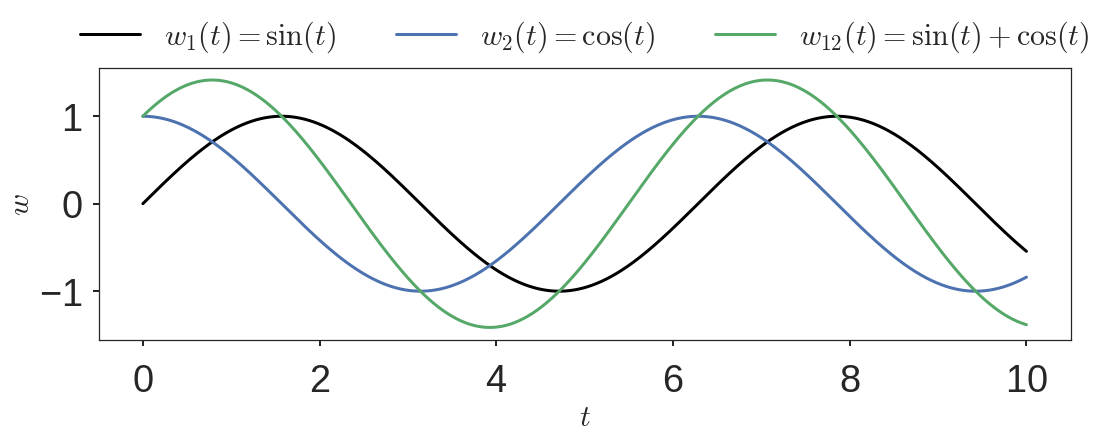

In [14]:
# plot just w1(t) and w12(t) for comparison
# make pretty legends while you are at it!
plot_manager.draw_plots(key_list = ['sine', 'cosine', 'interference'], xlabel = r'$t$', ylabel = r'$w$',\
                        legend = 'pretty', show_fig = False)

You find that the line thickness is too small for your liking.\
You can increase the line thickness using `draw_plots` function, but then you want a bigger line thickness every time you draw these waves.

Well, that's no problem! You can modify the data after it has been added.\
In fact, you can specify any argument you want to add or modify for any data you like. If you don't specify which data, the change is applied to every data you have added.

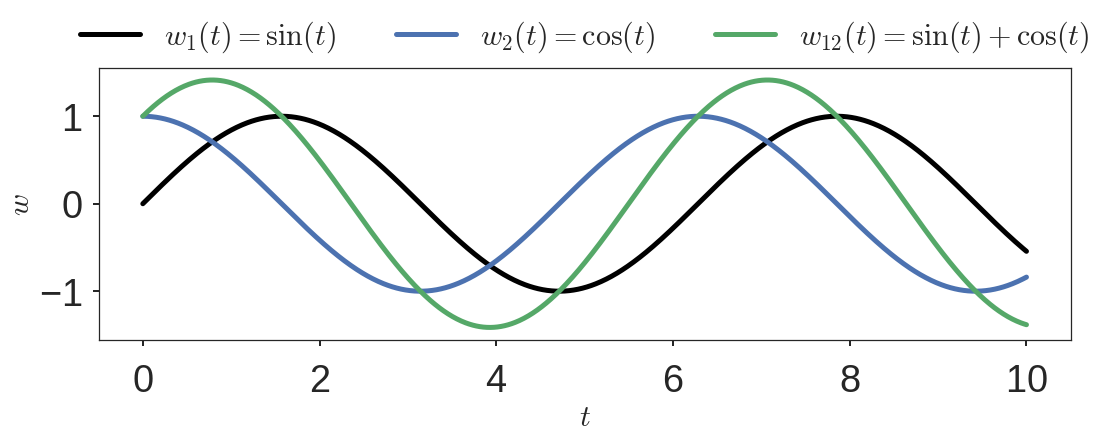

In [16]:
# make the lines thicker in all your data
plot_manager.modify_data(linewidth = 5)
# redraw your plot
plot_manager.draw_plots(key_list = ['sine', 'cosine', 'interference'], xlabel = r'$t$', ylabel = r'$w$',\
                        legend = 'pretty', show_fig = False)

That's all for this example, but we can do more using Plot Manager.\
Look at the docstring of the methods to see what other options are available.\
(And for those unsatisfied with the number of options, you can directly access the Figure and Axes objects.)

Plot Manager was used to generate the plots for our PRL and PRA submission. Check them out!